<a href="https://colab.research.google.com/github/walkingblack/HealthCare/blob/main/HealthCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lendo o arquivo CSV
df = pd.read_csv('healthcare_dataset.csv')

In [ ]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [ ]:
#Extrair as informações pelo info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [ ]:
#Descrição do arquivo
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [ ]:
#Descrição do que está nulo
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


Criação do grafico de barras

<ipython-input-15-f723eb25d33d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Gender',palette='viridis')


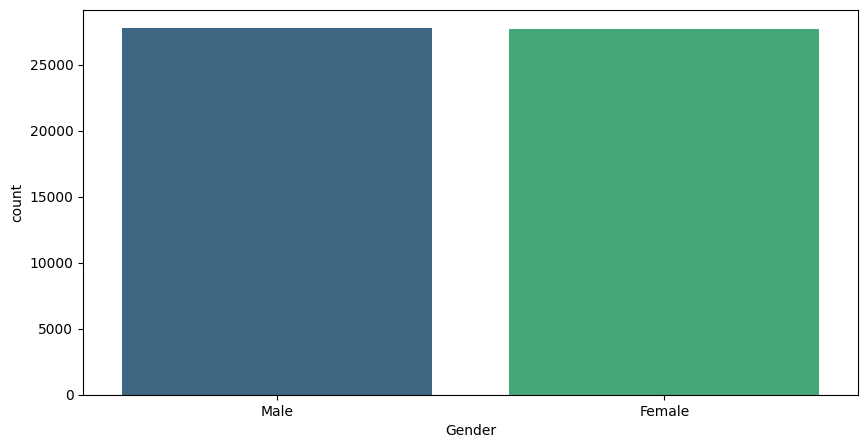

In [ ]:
#df ['Gender'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Gender',palette='viridis')
plt.show()

<ipython-input-16-d4ea865eab46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Blood Type',palette='viridis')


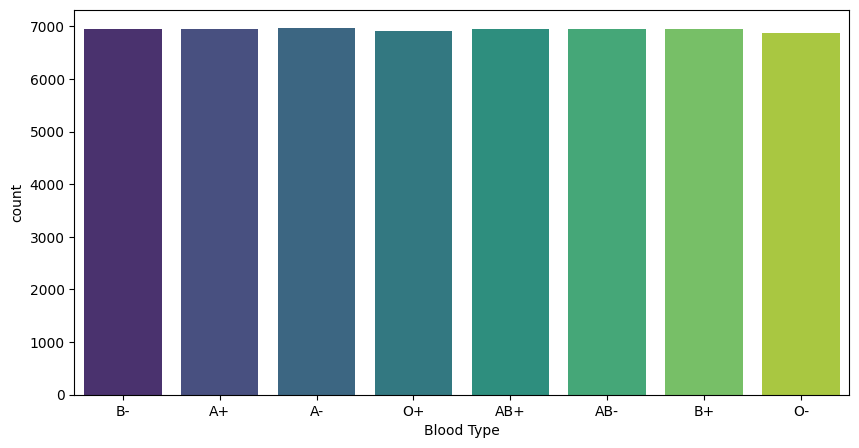

In [ ]:
#Distrinchado as barra em 8
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Blood Type',palette='viridis')
plt.show()

<ipython-input-18-aaf2aa4f4986>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Medical Condition',palette='viridis')


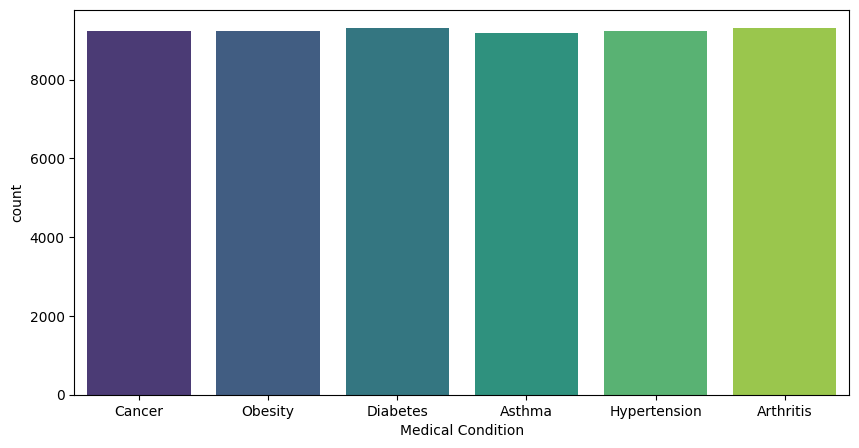

In [ ]:
#df['Medical Conditions'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Medical Condition',palette='viridis')
plt.show()

Gráfico indicando as medicações a serem tomadas

<ipython-input-21-1762cefd6557>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Medication',palette='viridis')


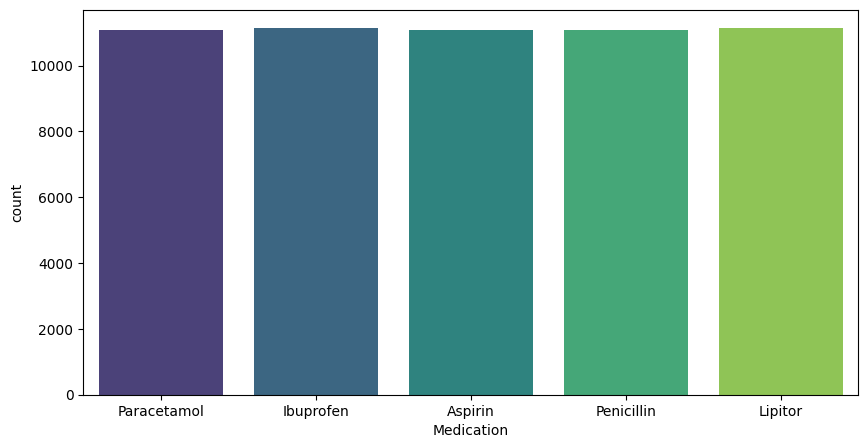

In [ ]:
df['Medication'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Medication',palette='viridis')
plt.show()
# sns.barplot(x=df['Medication'].value_counts().index,y=df['Medication'].value_counts().values)

Indicando o tipo de emergência

<ipython-input-23-13a127cd671a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Admission Type',palette='viridis')


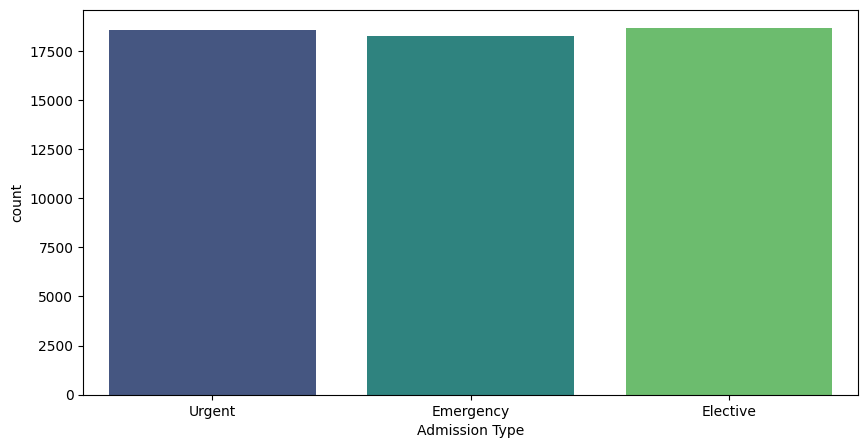

In [ ]:
#df['Medical Condition'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Admission Type',palette='viridis')
plt.show()

<ipython-input-24-d47ba65f04d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Insurance Provider',palette='viridis')


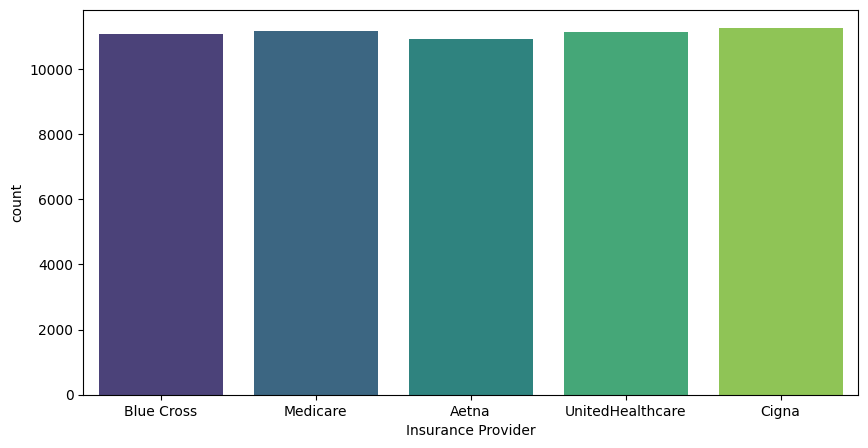

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Insurance Provider',palette='viridis')
plt.show()

In [ ]:
#Validação do tipo de sanguineo e a condição de saúde
tdf=df.copy()
tdf

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


Criação de gráfico formato oval

<ipython-input-26-47175b17317f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x='Age',y='Insurance Provider',palette='viridis')


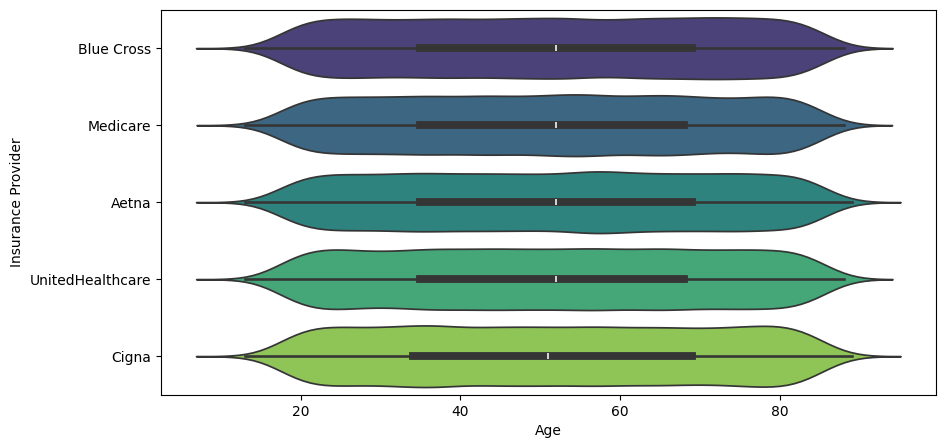

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df,x='Age',y='Insurance Provider',palette='viridis')
plt.show()

Criação de um grafico boxplot

<ipython-input-29-76836afd8744>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Medical Condition',y='Age',palette='viridis')


<Axes: xlabel='Medical Condition', ylabel='Age'>

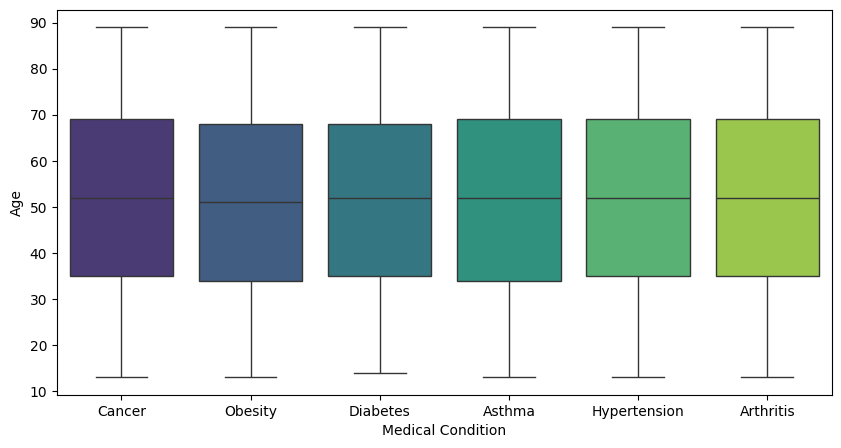

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Medical Condition',y='Age',palette='viridis')

Definição do grupo

In [ ]:
df.groupby(['Medical Condition'])['Billing Amount'].sum()

,Billing Amount
Medical Condition,
Arthritis,2.373291e+08
Asthma,2.354598e+08
Cancer,2.321679e+08
Diabetes,2.385397e+08
Hypertension,2.357207e+08
Obesity,2.382149e+08


Grafico indicando as cinco condições de saúde

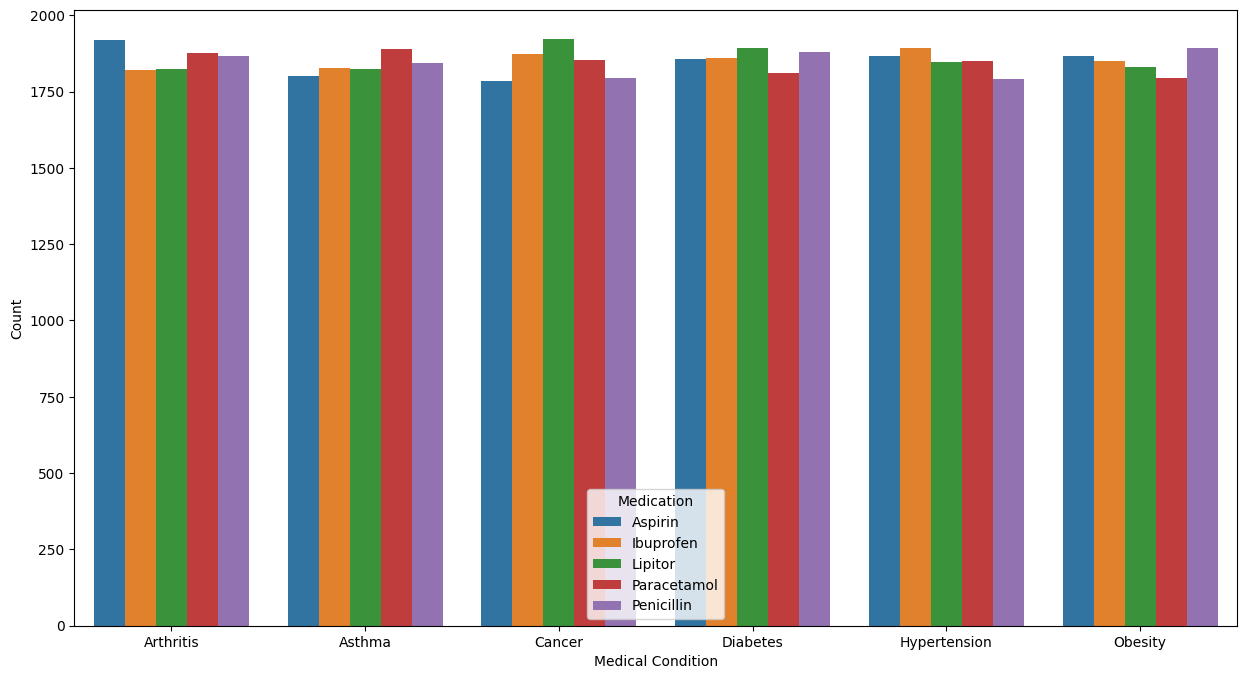

In [ ]:
plt.figure(figsize=(15,8))
mcm=df.groupby(['Medical Condition','Medication']).size().reset_index(name='Count')
sns.barplot(data=mcm,x='Medical Condition',y='Count',hue='Medication')
plt.show()

Função descrita por idade

In [ ]:
def a2gr(age):
  if age<14:
    return 'child'
  elif age>=14 and age <25:
    return 'teenagers'
  elif age>=25 and age <50:
    return 'adults'
  else:
    return 'seniors'

df['AgeGroup']=df['Age'].apply(lambda x: a2gr(x))

Grafico conforme a eratiedade

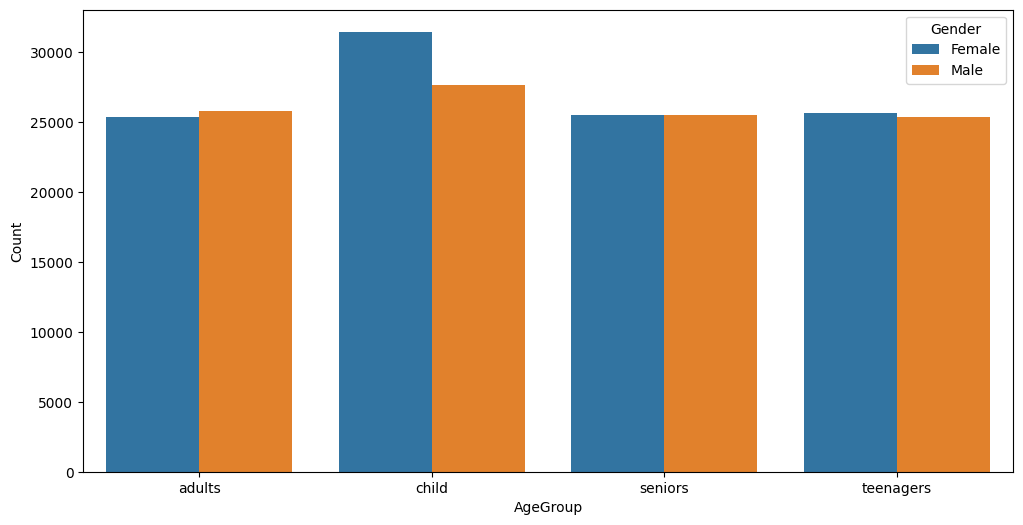

In [ ]:
plt.figure(figsize=(12,6))
ABill=df.groupby(['Gender','AgeGroup'])['Billing Amount'].mean().reset_index(name='Count')
sns.barplot(data=ABill,x='AgeGroup',y='Count',hue='Gender')
plt.show()

Grafico conforme o sexo e a tipagem sanguinea

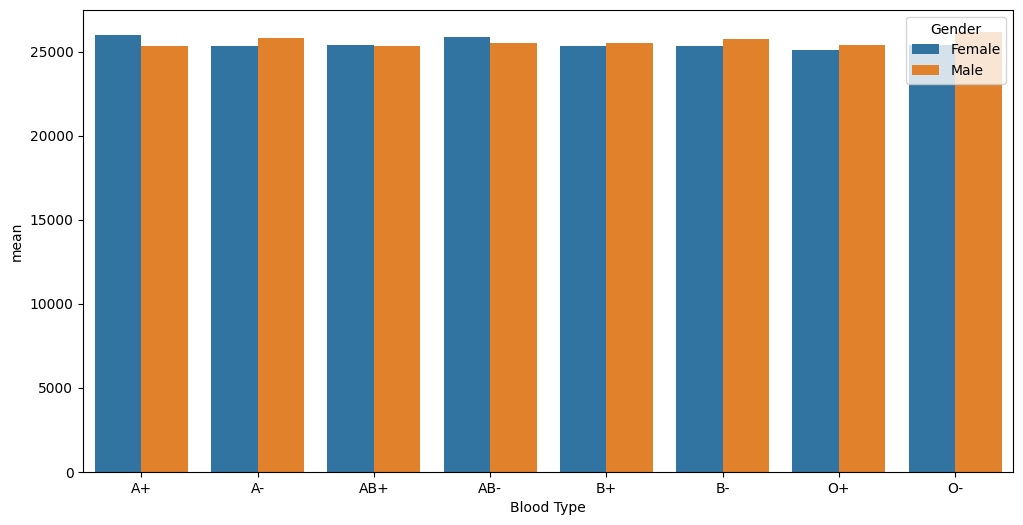

In [ ]:
plt.figure(figsize=(12,6))
ABill=df.groupby(['Gender','Blood Type'])['Billing Amount'].mean().reset_index(name='mean')
sns.barplot(data=ABill,x='Blood Type',y='mean',hue='Gender')
plt.show()

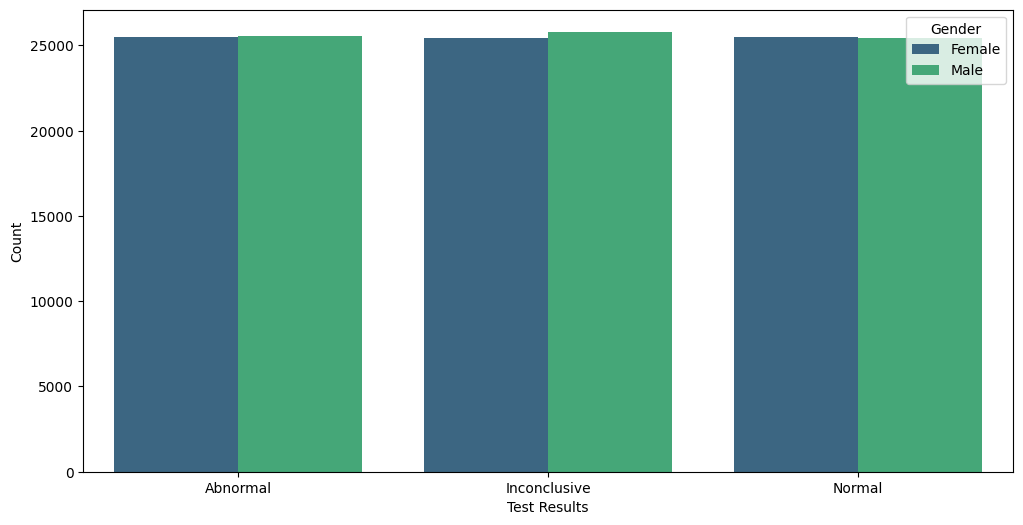

In [ ]:
plt.figure(figsize=(12,6))
ABill=df.groupby(['Gender','Test Results'])['Billing Amount'].mean().reset_index(name='Count')
sns.barplot(data=ABill,x='Test Results',y='Count',hue='Gender',palette='viridis')
plt.show()

Grafico conforme a condição médica e grupo de idade

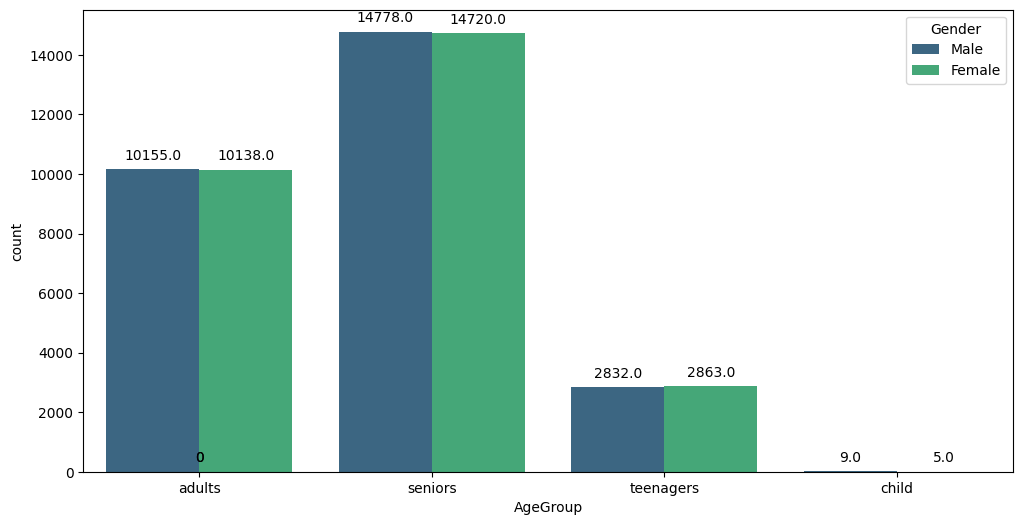

In [ ]:
# sns.countplot(data=df,x='AgeGroup',hue='Gender',palette='viridis')
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='AgeGroup', hue='Gender', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Contagem conforme a medicação e o genero

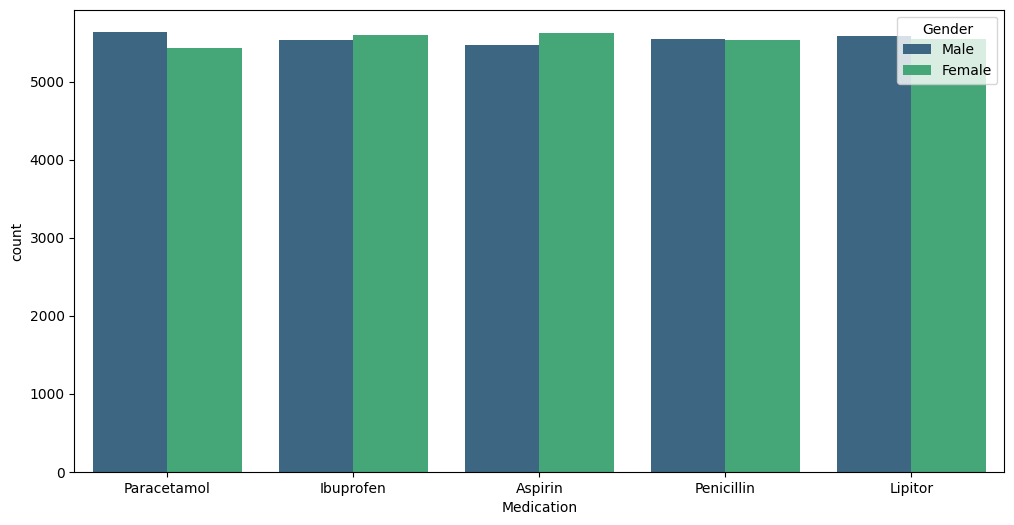

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Medication',hue='Gender',palette='viridis')
plt.show()